<a href="https://colab.research.google.com/github/sreejareddy03/Data-analytics-lab/blob/main/Lab_10_Descriptive_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descriptive data analytics**

Descriptive data analytics is the process of summarizing and describing historical data to understand "what happened" in the past. It's the most basic and foundational type of data analytics that transforms raw data into meaningful insights through statistical measures and visualizations.

Descriptive analytics answers questions like:

What happened?

When did it happen?

How often did it happen?

Where did it happen?

**Load and Inspect the Data**

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/healthcare_sample_data.csv")

# Show first 5 rows
print(df.head())

   PatientID  Age  Gender  BloodPressure  Cholesterol   BMI       Disease  \
0          1   25    Male            120          180  22.5           NaN   
1          2   34  Female            130          190  24.1      Diabetes   
2          3   45    Male            140          210  27.8  Hypertension   
3          4   52  Female            135          205  29.5      Diabetes   
4          5   63    Male            150          230  31.2         Heart   

   HospitalDays  
0             1  
1             3  
2             5  
3             4  
4             7  


In [3]:
# Basic info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      20 non-null     int64  
 1   Age            20 non-null     int64  
 2   Gender         20 non-null     object 
 3   BloodPressure  20 non-null     int64  
 4   Cholesterol    20 non-null     int64  
 5   BMI            20 non-null     float64
 6   Disease        13 non-null     object 
 7   HospitalDays   20 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.4+ KB
None


In [4]:
# Shape of data (rows, columns)
print("Dataset shape:", df.shape)

Dataset shape: (20, 8)


**Summary Statistics (Core of Descriptive Analytics)**

In [5]:
# Descriptive statistics for numerical columns
print(df.describe())

       PatientID        Age  BloodPressure  Cholesterol        BMI  \
count   20.00000  20.000000      20.000000    20.000000  20.000000   
mean    10.50000  46.250000     137.000000   205.400000  27.590000   
std      5.91608  13.353001      12.341628    22.605076   3.536859   
min      1.00000  25.000000     117.000000   170.000000  21.900000   
25%      5.75000  35.500000     128.750000   187.750000  24.950000   
50%     10.50000  46.000000     137.000000   202.500000  27.900000   
75%     15.25000  56.500000     145.750000   221.250000  30.275000   
max     20.00000  72.000000     160.000000   250.000000  33.800000   

       HospitalDays  
count     20.000000  
mean       4.200000  
std        2.566997  
min        1.000000  
25%        2.000000  
50%        4.000000  
75%        6.000000  
max       10.000000  


**Descriptive Stats for Categorical Data**

In [6]:
# Count of each gender
print(df["Gender"].value_counts())

# Count of each disease
print(df["Disease"].value_counts())

# Percentage distribution
print(df["Disease"].value_counts(normalize=True) * 100)

Gender
Male      10
Female    10
Name: count, dtype: int64
Disease
Diabetes        5
Hypertension    4
Heart           4
Name: count, dtype: int64
Disease
Diabetes        38.461538
Hypertension    30.769231
Heart           30.769231
Name: proportion, dtype: float64


**Measures of Central Tendency**

In [7]:
print("Mean Age:", df["Age"].mean())
print("Median Age:", df["Age"].median())
print("Mode Age:", df["Age"].mode()[0])

print("Mean BMI:", df["BMI"].mean())
print("Mean Cholesterol:", df["Cholesterol"].mean())

Mean Age: 46.25
Median Age: 46.0
Mode Age: 25
Mean BMI: 27.589999999999996
Mean Cholesterol: 205.4


**Measures of Dispersion (Spread)**

In [8]:
print("Std Dev of Age:", df["Age"].std())
print("Variance of Age:", df["Age"].var())
print("Min Age:", df["Age"].min())
print("Max Age:", df["Age"].max())
print("Range of Age:", df["Age"].max() - df["Age"].min())

Std Dev of Age: 13.353000845463441
Variance of Age: 178.30263157894737
Min Age: 25
Max Age: 72
Range of Age: 47


**Group-wise Descriptive Analysis**

Example: Average values by Gender or Disease.

In [9]:
# Group by Gender
print(df.groupby("Gender")[["Age", "BMI", "Cholesterol"]].mean())

# Group by Disease
print(df.groupby("Disease")[["Age", "HospitalDays"]].mean())

         Age    BMI  Cholesterol
Gender                          
Female  42.9  26.55        198.0
Male    49.6  28.63        212.8
                Age  HospitalDays
Disease                          
Diabetes      47.60          4.40
Heart         63.25          7.75
Hypertension  48.75          5.00


**Correlation Analysis (Numerical Relationships)**

This helps answer:

Does age relate to BP?

Does BMI relate to hospital days?

In [10]:
# Correlation matrix
print(df[["Age", "BMI", "BloodPressure", "Cholesterol", "HospitalDays"]].corr())

                    Age       BMI  BloodPressure  Cholesterol  HospitalDays
Age            1.000000  0.980970       0.958751     0.963895      0.938174
BMI            0.980970  1.000000       0.975329     0.974729      0.938187
BloodPressure  0.958751  0.975329       1.000000     0.981005      0.955249
Cholesterol    0.963895  0.974729       0.981005     1.000000      0.978126
HospitalDays   0.938174  0.938187       0.955249     0.978126      1.000000


**Simple Visual Descriptive Analytics (Optional but Powerful)**

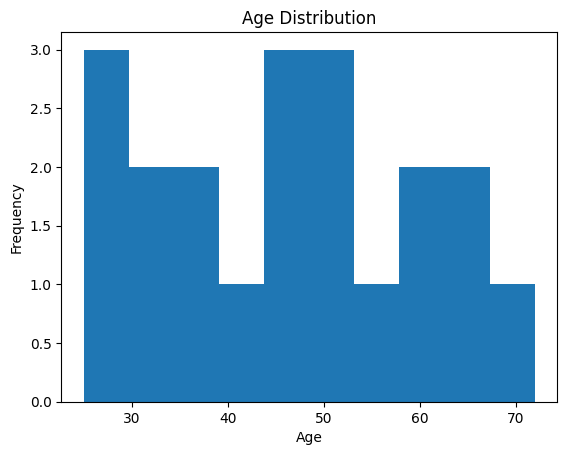

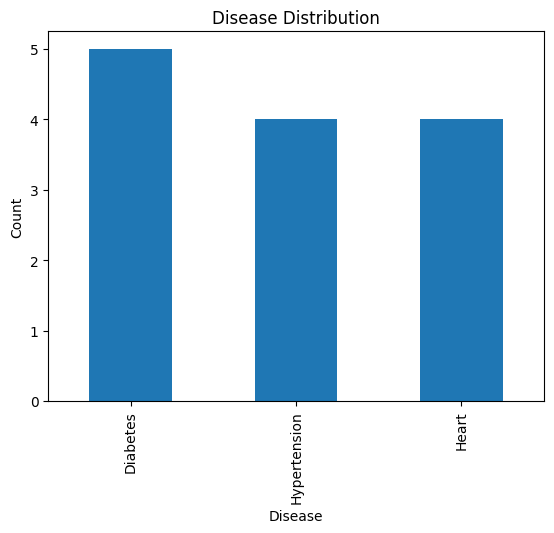

In [11]:
import matplotlib.pyplot as plt

# Histogram of Age
plt.figure()
plt.hist(df["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Bar chart of Disease counts
plt.figure()
df["Disease"].value_counts().plot(kind="bar")
plt.title("Disease Distribution")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.show()